In [2]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


A data frame with 32 observations on 11 (numeric) variables.

1. mpg	Miles/(US) gallon
2. cyl	Number of cylinders
3. disp	Displacement (cu.in.)
4.	hp	Gross horsepower
5.	drat	Rear axle ratio
6.	wt	Weight (1000 lbs)
7.	qsec	1/4 mile time
8.	vs	Engine (0 = V-shaped, 1 = straight)
9.	am	Transmission (0 = automatic, 1 = manual)
10.	gear	Number of forward gears
11.	carb	Number of carburetors

Нам треба спрогнозувати mpg. Для цього спробуємо використати лінійну регресію. Але спочатку подивимось чи є кореляція між різними показниками з нашим ключовим

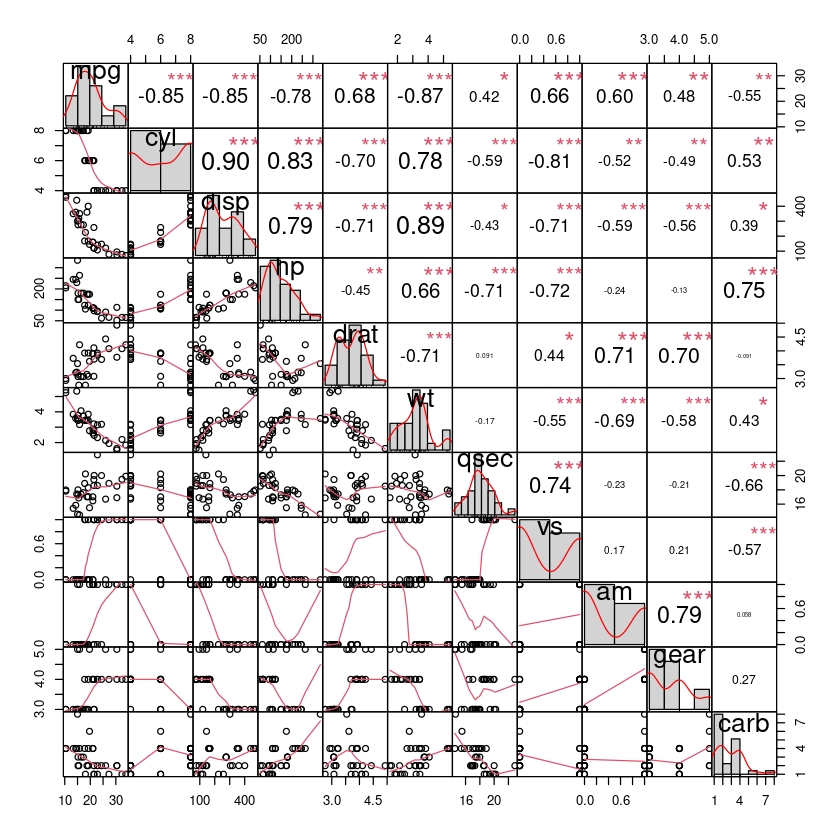

In [10]:
# install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)

suppressWarnings(chart.Correlation(mtcars, histogram = TRUE, method = "pearson"))

Можемо поглянути, що  у нас mpg  помітно корелює з параметрами cyl,dysp,hp,wt

In [3]:
library(caTools)
set.seed(1)
sample <- sample.split(mtcars$mpg, SplitRatio = 0.7)
train  <- subset(mtcars, sample == TRUE)
test   <- subset(mtcars, sample == FALSE)

In [4]:
model_full <- lm(mpg ~ .,data = train)
summary(model_full)


Call:
lm(formula = mpg ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4612 -0.8447  0.0587  0.6247  3.5799 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 25.55170   28.00857   0.912   0.3812  
cyl         -0.80098    1.58932  -0.504   0.6242  
disp         0.02992    0.01598   1.872   0.0880 .
hp          -0.02661    0.01934  -1.376   0.1961  
drat         0.25530    1.88674   0.135   0.8948  
wt          -5.44581    1.91330  -2.846   0.0159 *
qsec         0.37374    0.58980   0.634   0.5392  
vs           0.69194    1.83327   0.377   0.7130  
am          -0.61816    2.07897  -0.297   0.7717  
gear         1.45509    2.30114   0.632   0.5401  
carb         0.24217    0.99635   0.243   0.8124  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.903 on 11 degrees of freedom
Multiple R-squared:  0.9329,	Adjusted R-squared:  0.8719 
F-statistic: 15.29 on 10 and 11 DF,  p-value: 4.583e-0

In [76]:
train$vs <- as.factor(train$vs)
train$am <- as.factor(train$am)

Спробуємо знайти оптимальну кількість параметрів двома способами. 
### *Перший спосіб*  
Вилучимо всі змінні, що не впливають на відгук ,а потім будемо додавати нові відгуки за збільшенням p-value

In [77]:
model_categorical <- lm(mpg ~ .,data = train)
summary(model_categorical)


Call:
lm(formula = mpg ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4612 -0.8447  0.0587  0.6247  3.5799 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 25.55170   28.00857   0.912   0.3812  
cyl         -0.80098    1.58932  -0.504   0.6242  
disp         0.02992    0.01598   1.872   0.0880 .
hp          -0.02661    0.01934  -1.376   0.1961  
drat         0.25530    1.88674   0.135   0.8948  
wt          -5.44581    1.91330  -2.846   0.0159 *
qsec         0.37374    0.58980   0.634   0.5392  
vs1          0.69194    1.83327   0.377   0.7130  
am1         -0.61816    2.07897  -0.297   0.7717  
gear         1.45509    2.30114   0.632   0.5401  
carb         0.24217    0.99635   0.243   0.8124  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.903 on 11 degrees of freedom
Multiple R-squared:  0.9329,	Adjusted R-squared:  0.8719 
F-statistic: 15.29 on 10 and 11 DF,  p-value: 4.583e-0

In [78]:
model_signf <- lm(mpg ~disp+wt,data = train)
summary(model_signf)


Call:
lm(formula = mpg ~ disp + wt, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8023 -1.8470 -0.3169  1.8367  3.9854 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.910511   2.100729  17.094 5.41e-13 ***
disp        -0.008370   0.008535  -0.981 0.339110    
wt          -4.472743   1.087833  -4.112 0.000594 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.275 on 19 degrees of freedom
Multiple R-squared:  0.8343,	Adjusted R-squared:  0.8169 
F-statistic: 47.84 on 2 and 19 DF,  p-value: 3.828e-08


In [79]:
model_signf_plus <- lm(mpg ~disp+wt+hp,dat=train)
summary(model_signf_plus)


Call:
lm(formula = mpg ~ disp + wt + hp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5564 -1.2886  0.1693  1.5801  2.6840 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.126278   1.896261  19.579 1.39e-13 ***
disp         0.002222   0.008499   0.261 0.796690    
wt          -4.433990   0.951993  -4.658 0.000196 ***
hp          -0.025432   0.009742  -2.611 0.017701 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.99 on 18 degrees of freedom
Multiple R-squared:  0.8798,	Adjusted R-squared:  0.8598 
F-statistic: 43.93 on 3 and 18 DF,  p-value: 1.74e-08


In [80]:
model_signf_plus2 <- lm(mpg ~disp+wt+hp+qsec,dat=train)
summary(model_signf_plus2)


Call:
lm(formula = mpg ~ disp + wt + hp + qsec, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5449 -1.1855 -0.0867  1.2867  2.6851 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.307239   6.897348   3.814 0.001388 ** 
disp         0.007348   0.008725   0.842 0.411404    
wt          -5.514069   1.127722  -4.890 0.000138 ***
hp          -0.012097   0.012419  -0.974 0.343682    
qsec         0.633478   0.389618   1.626 0.122365    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.905 on 17 degrees of freedom
Multiple R-squared:  0.896,	Adjusted R-squared:  0.8715 
F-statistic: 36.61 on 4 and 17 DF,  p-value: 3.804e-08


In [81]:
model_signf_plus3 <- lm(mpg ~disp+wt+hp+qsec+cyl,dat=train)
summary(model_signf_plus3)


Call:
lm(formula = mpg ~ disp + wt + hp + qsec + cyl, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7378 -0.6541  0.0106  0.9402  2.6961 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.112883   7.598785   4.752 0.000216 ***
disp         0.018796   0.009372   2.005 0.062132 .  
wt          -4.875454   1.054077  -4.625 0.000281 ***
hp          -0.010306   0.011202  -0.920 0.371234    
qsec         0.263554   0.387628   0.680 0.506278    
cyl         -1.310072   0.585878  -2.236 0.039943 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.714 on 16 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.896 
F-statistic: 37.18 on 5 and 16 DF,  p-value: 2.946e-08


Як ми бачимо наш Multiple R-squared доволі близький до нашої повної моделі, тому не будемо додавати нові змінні

### *Другий спосіб.* 
Будемо поступово вилучати змінні з найменшим p-value

In [82]:
model_full <- lm(mpg ~ .,data = train)
summary(model_full)


Call:
lm(formula = mpg ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4612 -0.8447  0.0587  0.6247  3.5799 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 25.55170   28.00857   0.912   0.3812  
cyl         -0.80098    1.58932  -0.504   0.6242  
disp         0.02992    0.01598   1.872   0.0880 .
hp          -0.02661    0.01934  -1.376   0.1961  
drat         0.25530    1.88674   0.135   0.8948  
wt          -5.44581    1.91330  -2.846   0.0159 *
qsec         0.37374    0.58980   0.634   0.5392  
vs1          0.69194    1.83327   0.377   0.7130  
am1         -0.61816    2.07897  -0.297   0.7717  
gear         1.45509    2.30114   0.632   0.5401  
carb         0.24217    0.99635   0.243   0.8124  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.903 on 11 degrees of freedom
Multiple R-squared:  0.9329,	Adjusted R-squared:  0.8719 
F-statistic: 15.29 on 10 and 11 DF,  p-value: 4.583e-0

In [83]:
model_first_cut <- lm(mpg ~ .-carb-am-vs,data = train)
summary(model_first_cut)


Call:
lm(formula = mpg ~ . - carb - am - vs, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5421 -0.9270  0.0268  0.6039  3.3215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.73734   15.91245   1.178 0.258616    
cyl         -0.58373    0.80805  -0.722 0.481943    
disp         0.02675    0.01109   2.412 0.030150 *  
hp          -0.02371    0.01485  -1.597 0.132593    
drat         0.53584    1.32742   0.404 0.692555    
wt          -5.05549    1.06568  -4.744 0.000314 ***
qsec         0.55297    0.44300   1.248 0.232415    
gear         1.73656    1.26957   1.368 0.192921    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.719 on 14 degrees of freedom
Multiple R-squared:  0.9303,	Adjusted R-squared:  0.8954 
F-statistic: 26.68 on 7 and 14 DF,  p-value: 4.636e-07


In [84]:
model_second_cut <- lm(mpg ~ .-carb-am-vs-cyl,data = train)
summary(model_second_cut)


Call:
lm(formula = mpg ~ . - carb - am - vs - cyl, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8431 -0.9507  0.0320  0.5922  3.3169 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.55445    9.41803   1.014 0.326436    
disp         0.02696    0.01091   2.471 0.025948 *  
hp          -0.02865    0.01297  -2.210 0.043091 *  
drat         0.91876    1.19744   0.767 0.454827    
wt          -5.26173    1.01023  -5.208 0.000106 ***
qsec         0.74415    0.34956   2.129 0.050248 .  
gear         2.29947    0.98620   2.332 0.034071 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.692 on 15 degrees of freedom
Multiple R-squared:  0.9277,	Adjusted R-squared:  0.8987 
F-statistic: 32.06 on 6 and 15 DF,  p-value: 9.862e-08


In [85]:
model_third_cut <- lm(mpg ~ .-carb-am-vs-cyl-drat,data = train)
summary(model_third_cut)


Call:
lm(formula = mpg ~ . - carb - am - vs - cyl - drat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0060 -0.9024  0.0447  0.5750  3.0770 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.18599    8.03700   1.641   0.1204    
disp         0.02471    0.01037   2.382   0.0300 *  
hp          -0.02878    0.01280  -2.249   0.0390 *  
wt          -5.35151    0.99045  -5.403 5.86e-05 ***
qsec         0.75314    0.34484   2.184   0.0442 *  
gear         2.39289    0.96600   2.477   0.0248 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.67 on 16 degrees of freedom
Multiple R-squared:  0.9248,	Adjusted R-squared:  0.9013 
F-statistic: 39.37 on 5 and 16 DF,  p-value: 1.944e-08


Як ми бачимо по значенням p-value всі наші змінні мають статистично значимий вплив, тому перестанемо прибирати інші змінні

Залишимо собі тут памятку про те, які змінні використовуються для прогнозування в тих чи інших моделях
1. model_third_cut = disp ,hp,wt,qsec,gear
2. model_signf_plus3 = disp, wt ,hp, qsc ,cyl

3. most_correlation = cyl,dysp,hp,wt

Спробуємо тепер спрогнозувати значення на тестовій вибірці. Для порівняння результатів візьмемо метрику mse

In [ ]:
mpg ~ disp + hp + wt + qsec + gear

In [86]:
test

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


In [87]:
library("Metrics")
y_real<-test$mpg
test$vs <- as.factor(test$vs)
test$am <- as.factor(test$am)
cat('MSE:\nfull: ',mse(y_real,predict(model_full,test)),
     '\nadding :',mse(y_real,predict(model_signf_plus3,test)),
   '\nsubtracting:',mse(y_real,predict(model_third_cut,test)))

MSE:
full:  14.74655 
adding : 13.10643 
subtracting: 14.14823

Як ми бачимо наша модель в якій ми додавали різні значення виявилась найкращою. Подивимось на залишки наших моделей

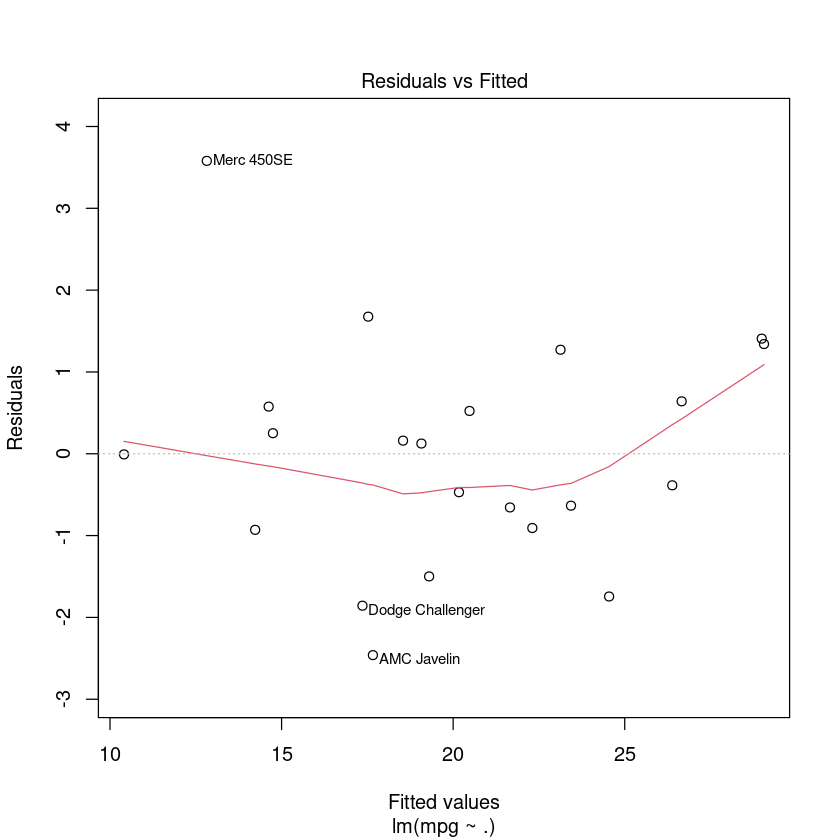

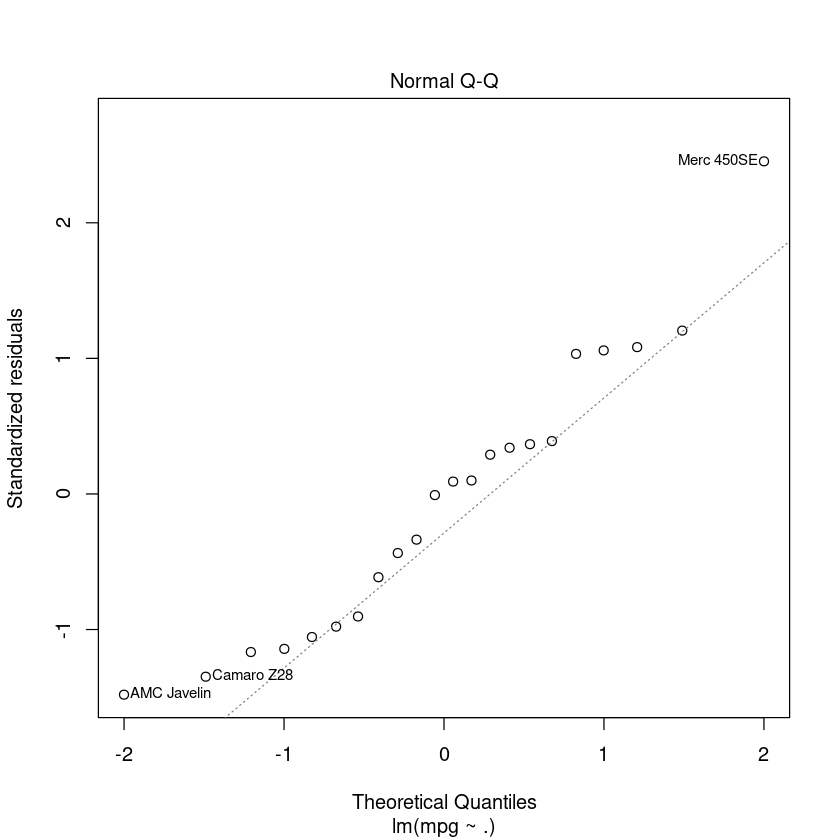

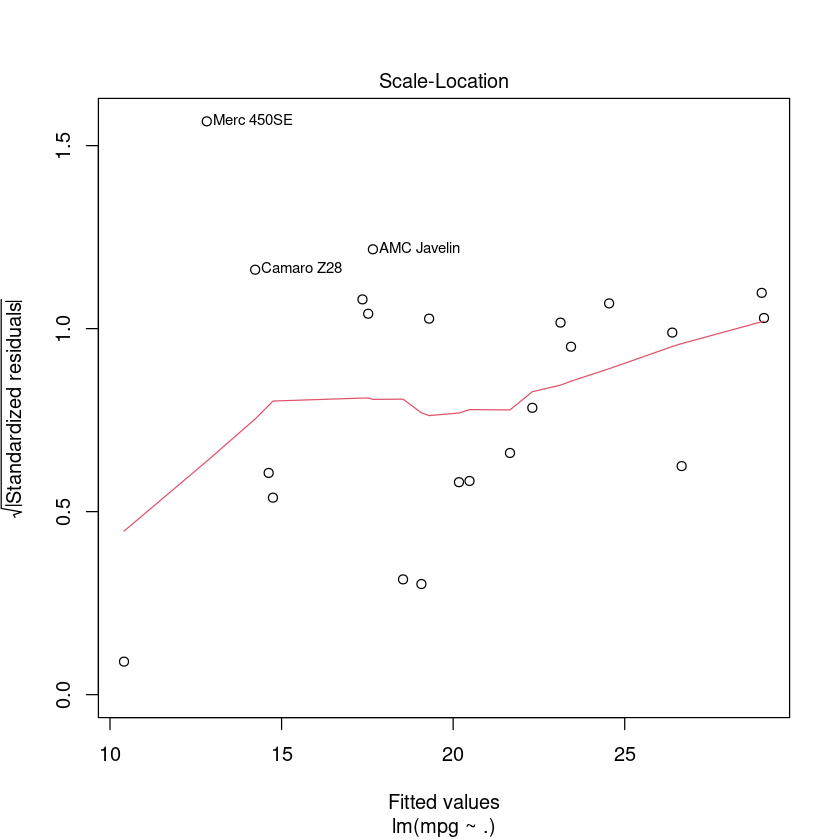

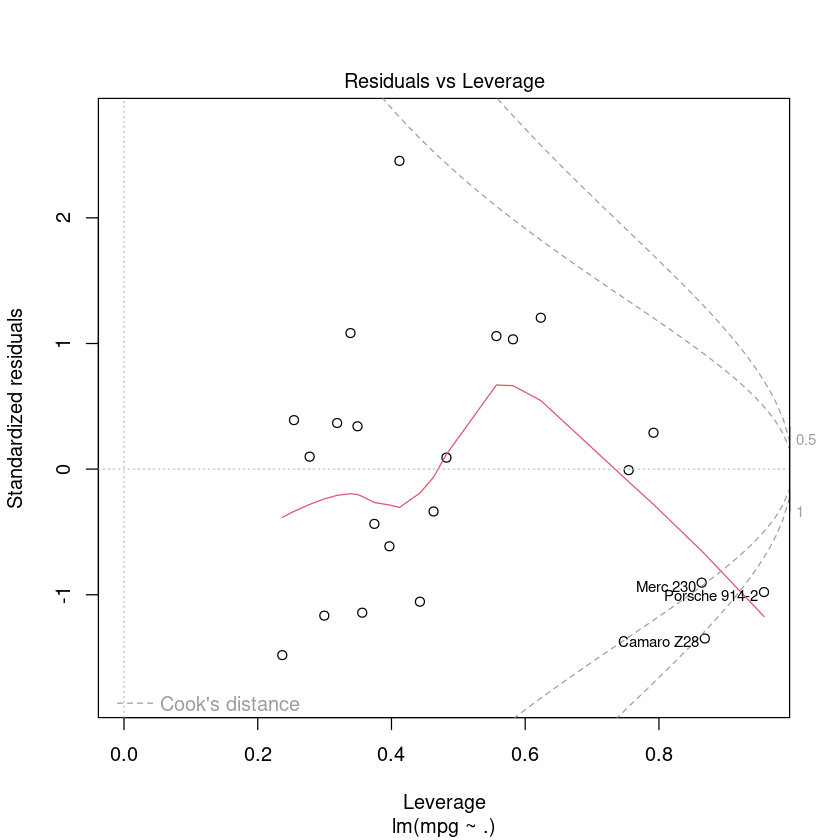

In [88]:
plot(model_full)

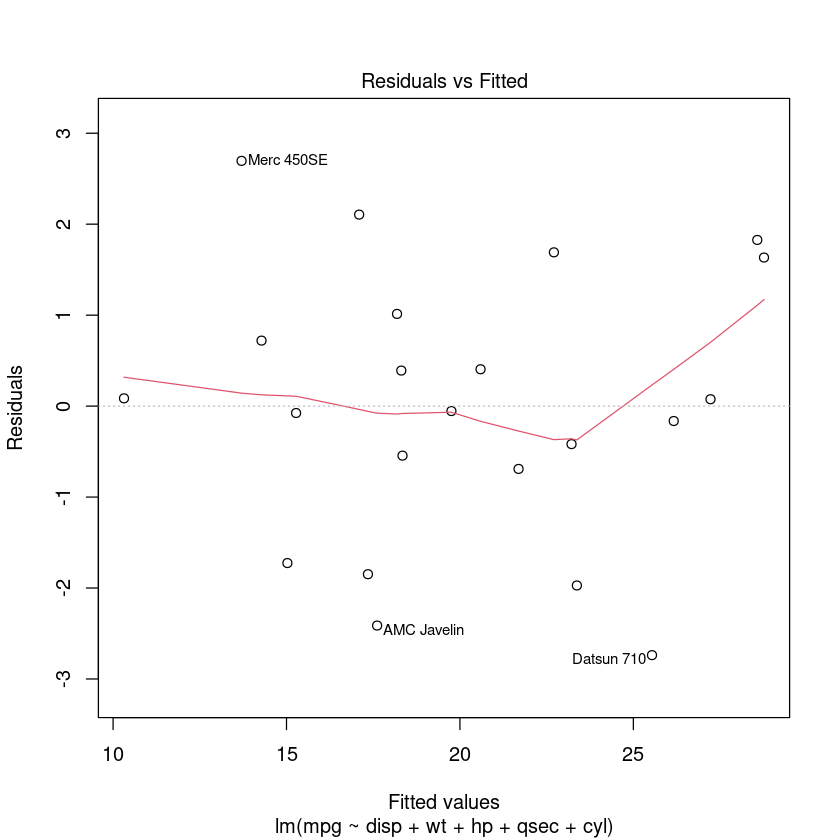

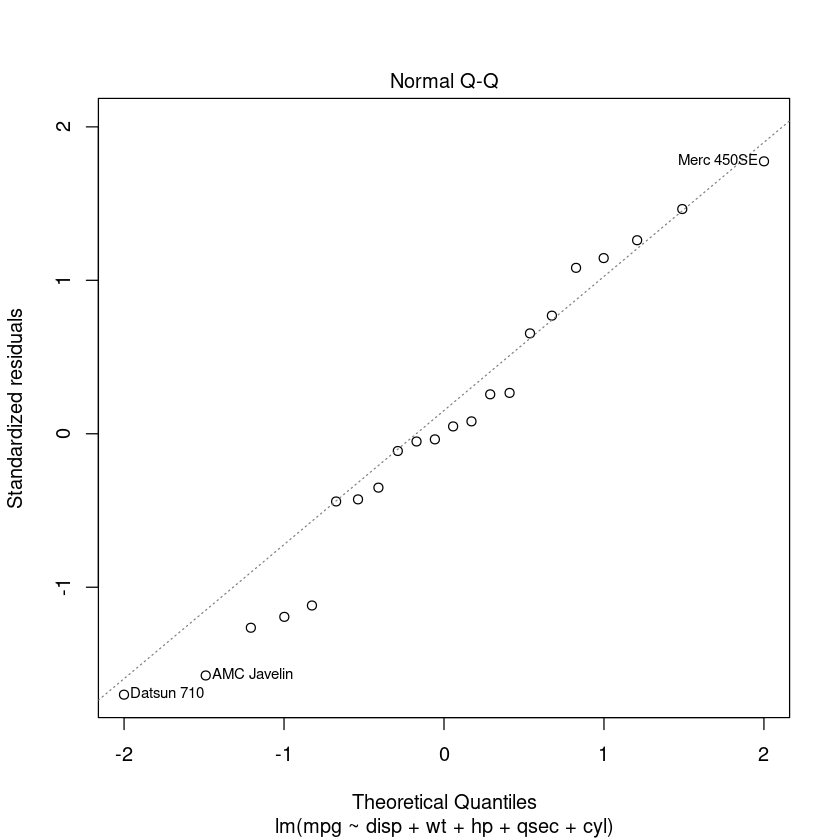

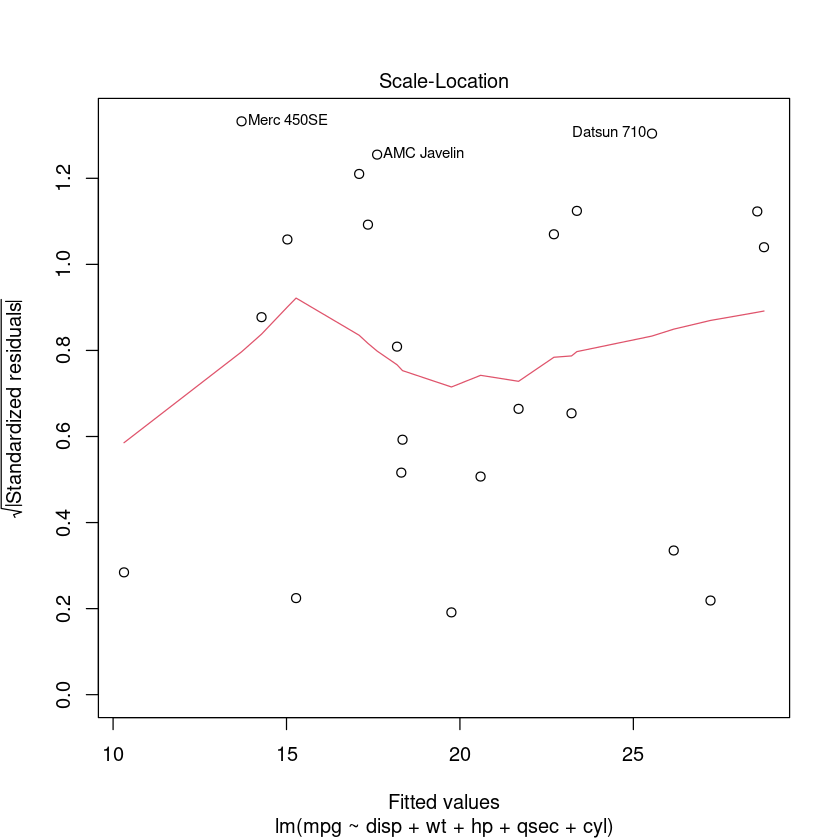

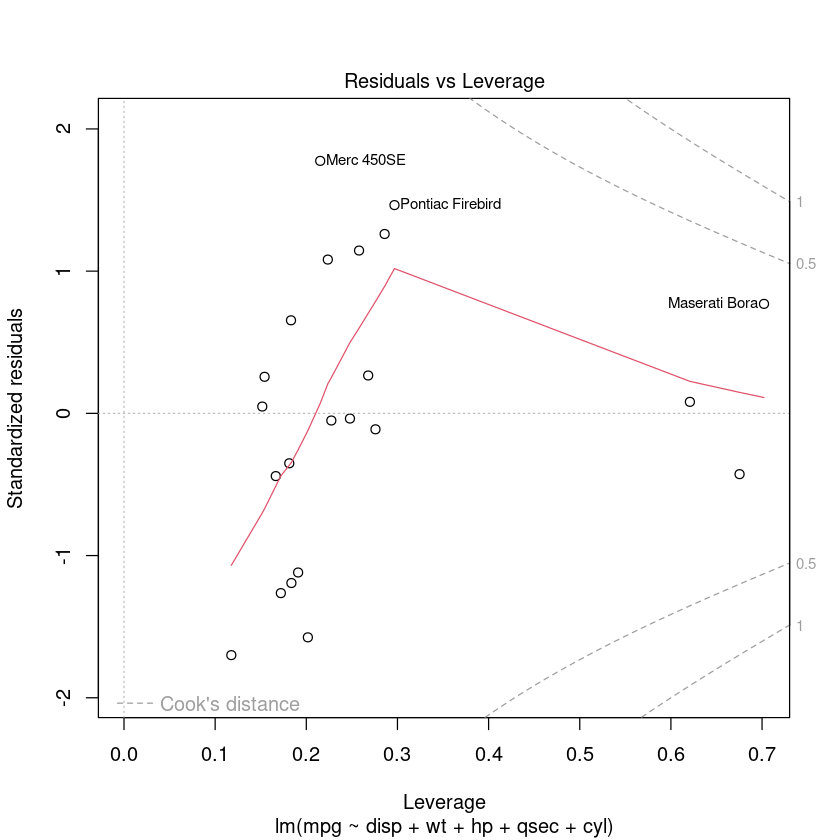

In [89]:
plot(model_signf_plus3)

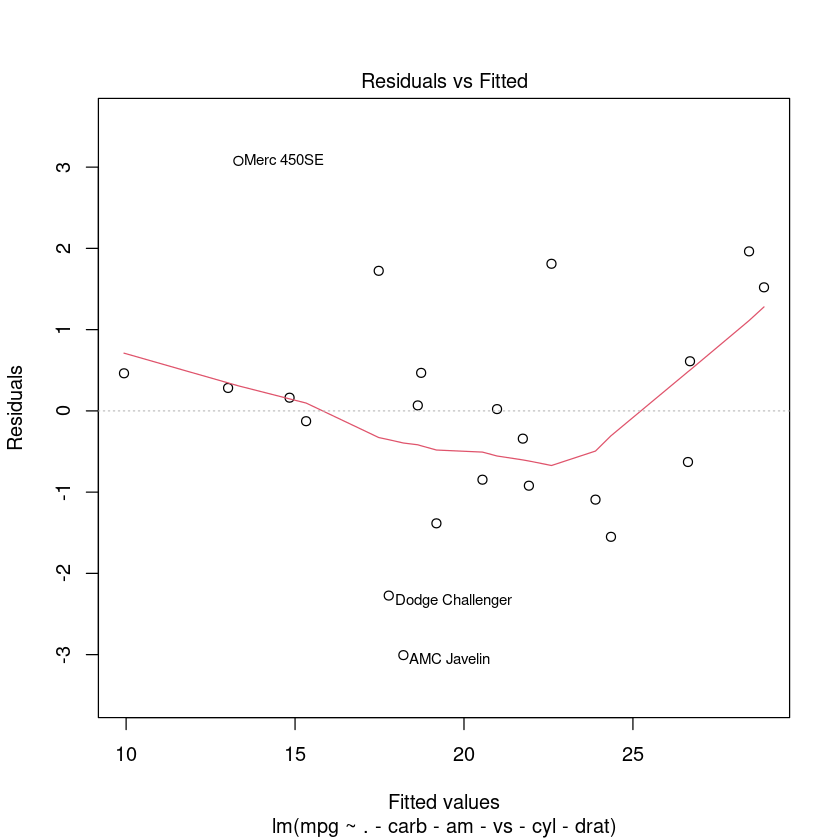

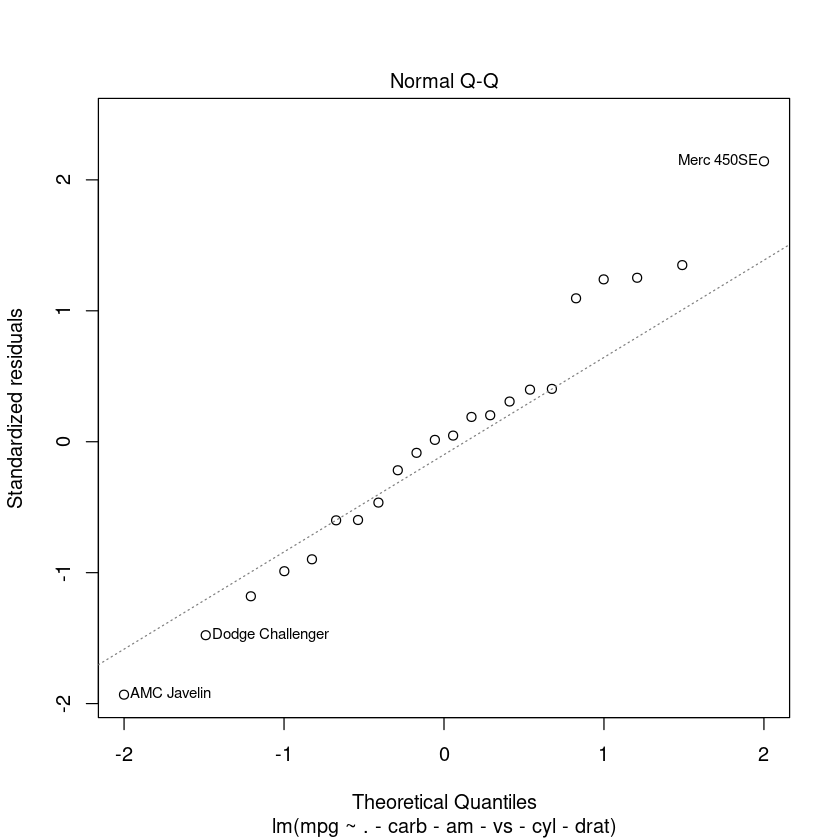

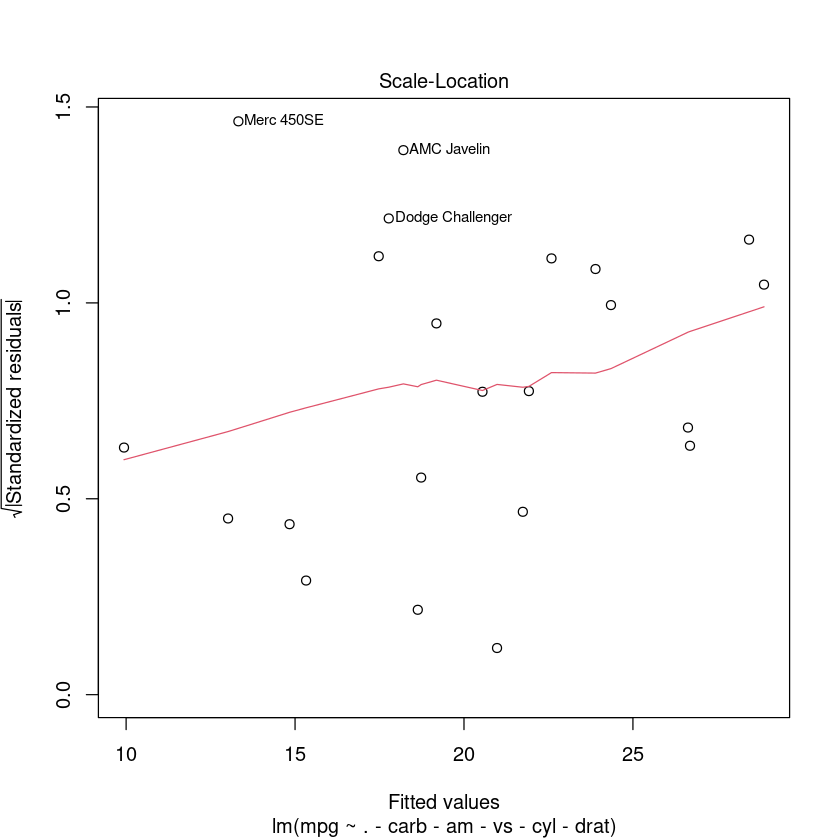

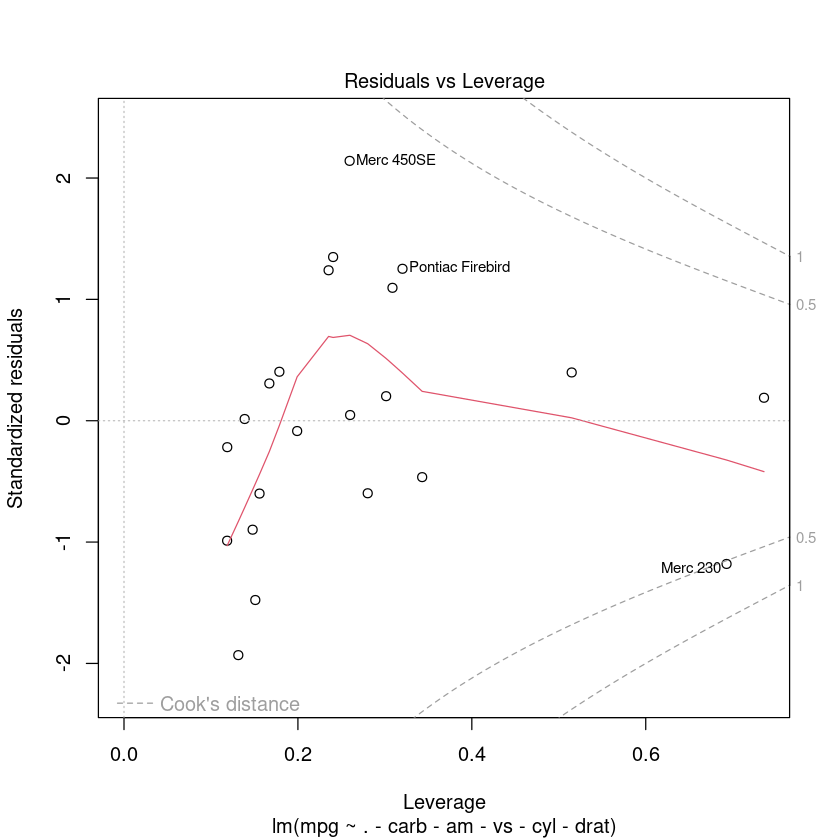

In [90]:
plot(model_third_cut)

In [91]:
shapiro.test(y_real-predict(model_full,test))


	Shapiro-Wilk normality test

data:  y_real - predict(model_full, test)
W = 0.88053, p-value = 0.1323


In [92]:
shapiro.test(y_real-predict(model_full,test))


	Shapiro-Wilk normality test

data:  y_real - predict(model_full, test)
W = 0.88053, p-value = 0.1323


In [93]:
shapiro.test(y_real-predict(model_signf_plus3,test))


	Shapiro-Wilk normality test

data:  y_real - predict(model_signf_plus3, test)
W = 0.88992, p-value = 0.1692


In [94]:
shapiro.test(y_real-predict(model_third_cut,test))


	Shapiro-Wilk normality test

data:  y_real - predict(model_third_cut, test)
W = 0.9036, p-value = 0.2399


Залишки розподілені нормально, гомоскедастичні. Судячи з графіків краще всього показує модель model_third_cut

Спробуємо тепер також зробити модель в якій будуть перетинатись наші змінні з двух найкращих моделей різних способів

In [95]:
model_in <- lm(mpg ~ disp+wt+hp,data = train)
summary(model_in)


Call:
lm(formula = mpg ~ disp + wt + hp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5564 -1.2886  0.1693  1.5801  2.6840 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.126278   1.896261  19.579 1.39e-13 ***
disp         0.002222   0.008499   0.261 0.796690    
wt          -4.433990   0.951993  -4.658 0.000196 ***
hp          -0.025432   0.009742  -2.611 0.017701 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.99 on 18 degrees of freedom
Multiple R-squared:  0.8798,	Adjusted R-squared:  0.8598 
F-statistic: 43.93 on 3 and 18 DF,  p-value: 1.74e-08


In [96]:
mse(y_real,predict(model_in,test))

[1] 13.57581

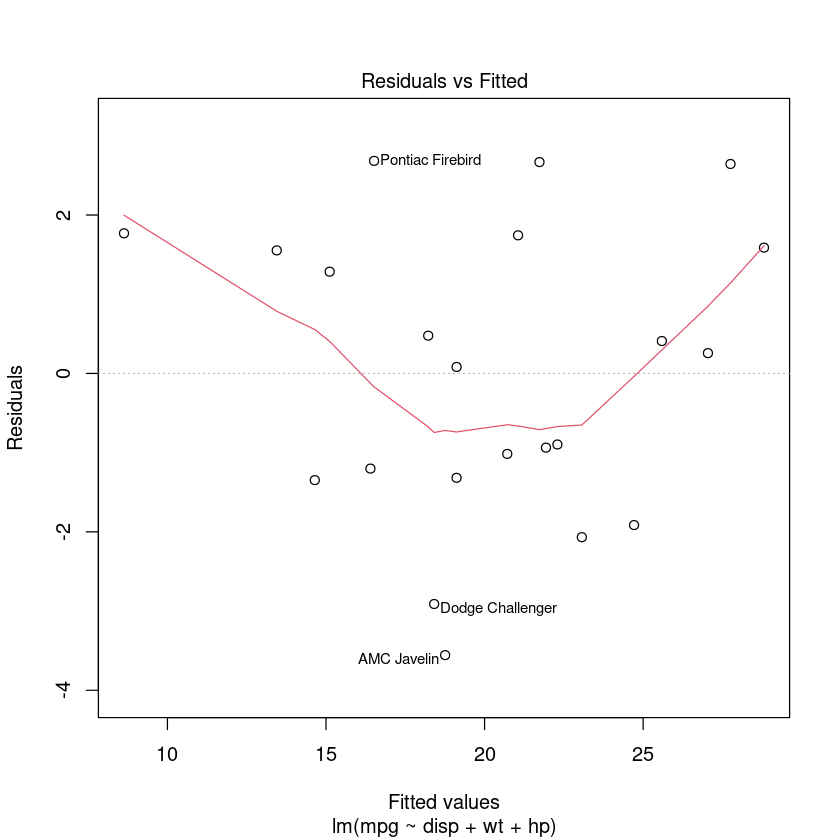

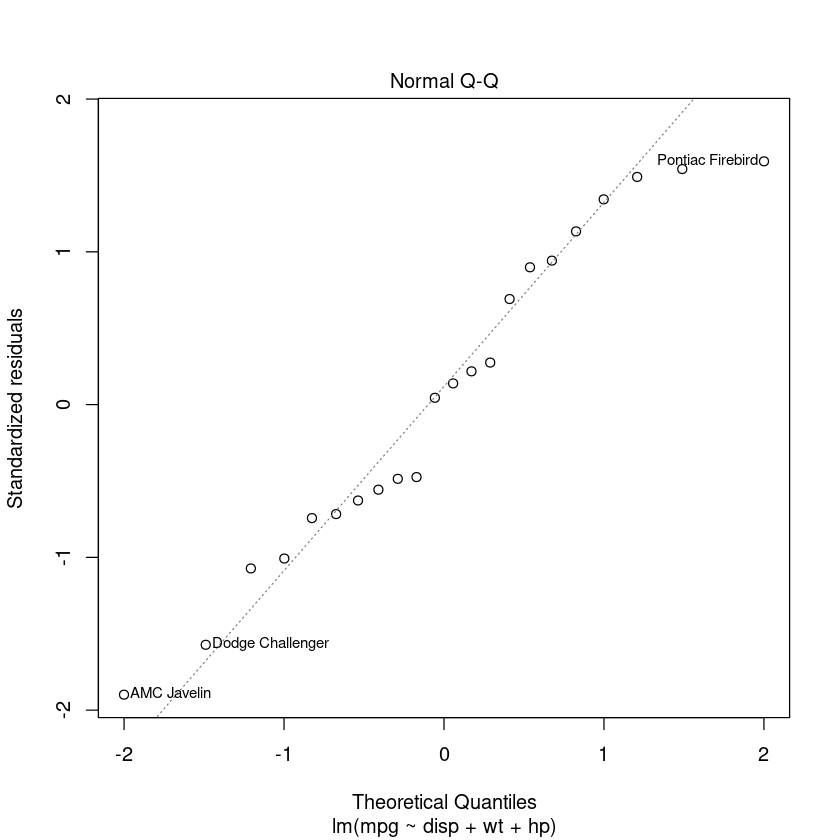

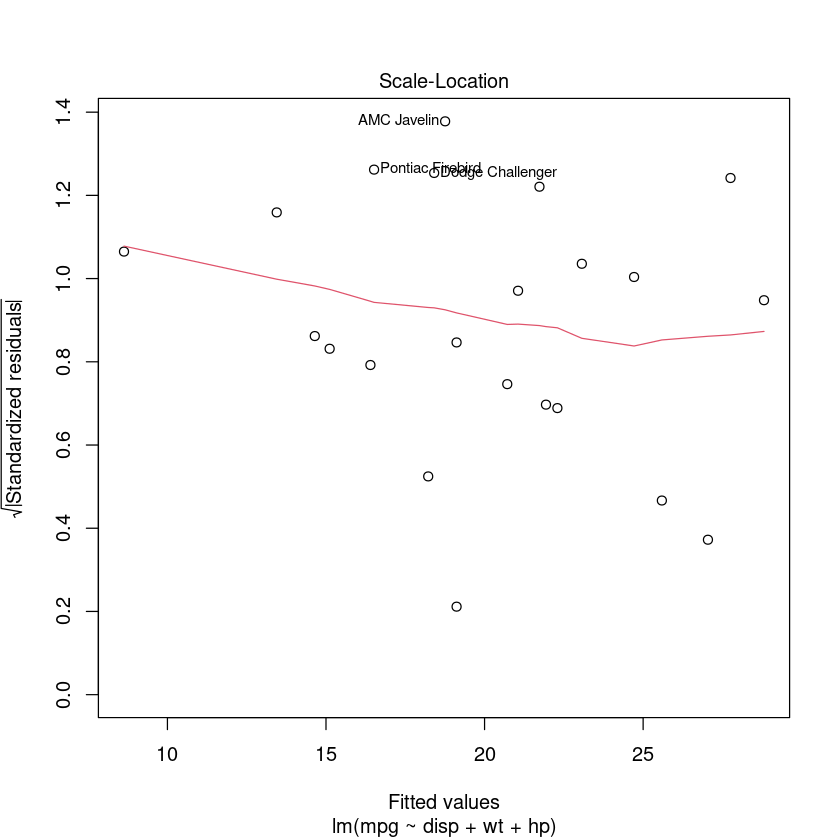

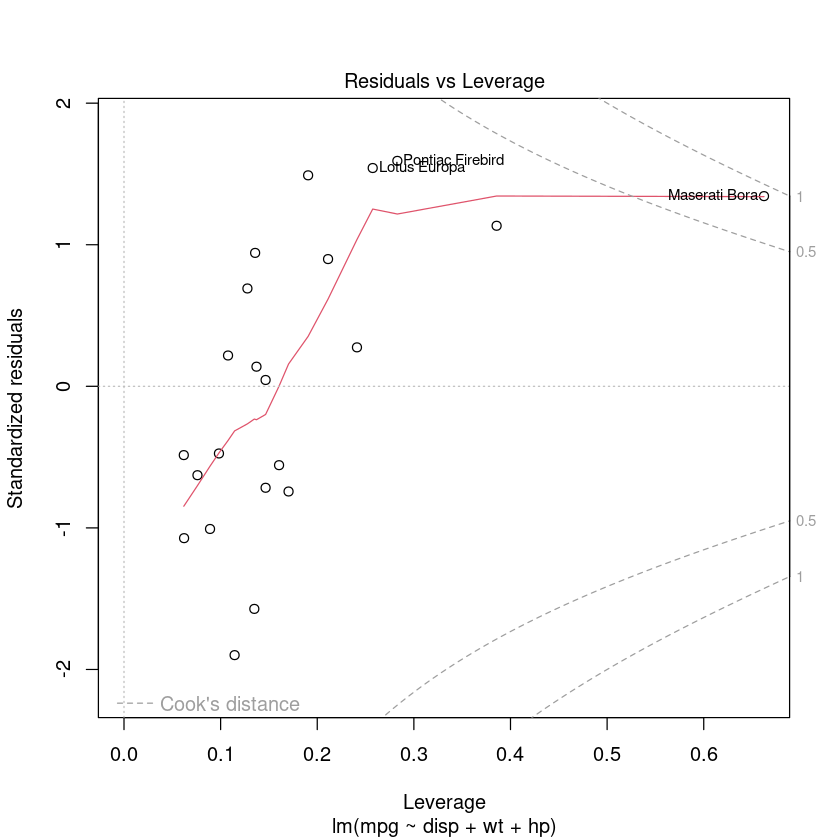

In [97]:
plot(model_in)

Судячи з метрики mse наша модель доволі непогано прогнозує цільове значення. Але якщо подивитись на графіки з залишками можна побачити зокрема, що залишки не гомоскедастичні та те, що є змінні , які доволі сильно впливають на коефіцієнти моделі. 

Висновок:

Ми знайшли змінні, якими можна прогнозувати пробіг автомобіля. Можна вибрати будь-яку комбінацію із параметрів. Подано в порядку пріорітетності:
1. disp, wt ,hp, qsc ,cyl
2. disp ,wt,hp, qsec,gear

In [5]:
library(stats)
step(model_full)

Start:  AIC=35.06
mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- drat  1    0.0663 39.894 33.094
- carb  1    0.2139 40.042 33.175
- am    1    0.3201 40.148 33.234
- vs    1    0.5158 40.344 33.341
- cyl   1    0.9196 40.748 33.560
- gear  1    1.4477 41.276 33.843
- qsec  1    1.4539 41.282 33.846
<none>              39.828 35.058
- hp    1    6.8584 46.686 36.553
- disp  1   12.6916 52.520 39.143
- wt    1   29.3329 69.161 45.199

Step:  AIC=33.09
mpg ~ cyl + disp + hp + wt + qsec + vs + am + gear + carb

       Df Sum of Sq    RSS    AIC
- am    1     0.392 40.286 31.309
- vs    1     0.482 40.376 31.359
- carb  1     0.642 40.536 31.445
- qsec  1     1.393 41.287 31.849
- gear  1     1.625 41.520 31.973
- cyl   1     2.023 41.917 32.182
<none>              39.894 33.094
- hp    1     6.916 46.810 34.611
- disp  1    13.710 53.604 37.593
- wt    1    39.924 79.818 46.351

Step:  AIC=31.31
mpg ~ cyl + disp + hp + wt + qsec + vs 


Call:
lm(formula = mpg ~ disp + hp + wt + qsec + gear, data = train)

Coefficients:
(Intercept)         disp           hp           wt         qsec         gear  
   13.18599      0.02471     -0.02878     -5.35151      0.75314      2.39289  
